In [2]:
from collections import Counter
import scipy.spatial
import allel
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy
from functools import reduce
import numpy as np
import os
os.chdir('/home/dany/Documents/renewp')
# import all the library to be used
%matplotlib inline
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
# set size of the labels to be more visible
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

In [2]:
# load the phased VCF file corresponding to the ace1 entire region
ace = allel.read_vcf('a1.gt.vcf')

In [3]:
# get phased genotype of all individuals at position 3491812 index 4170, 3492028 index 4216,
# 3492074 index 4233, 3492202 index 4265.
# Only the first number is considered as an indicator of the firts set of alleles 
# belonging to the same haplotype

o1 = list(ace['calldata/GT'][4170])
o2 = [l.tolist() for l in o1]
op2 = []
for l in o2:
    x = str("".join(map(str, l)))
    op2.append(x)
op = set(op2)  
{'00', '01', '10'}
for n, i in enumerate(op2):
    if i == '00':
        op2[n] = 'C'
    elif i == '01':
        op2[n] = 'C'
    else:
        op2[n] = 'T'
        

o2 = list(ace['calldata/GT'][4216])
o3 = [l.tolist() for l in o2]
op3 = []
for l in o3:
    x = str("".join(map(str, l)))
    op3.append(x)
ops = set(op3)   
{'00', '01', '02', '03', '20', '22', '23', '30'}

for n, i in enumerate(op3):
    if i == '00':
        op3[n] = 'A'
    elif i == '01':
        op3[n] = 'A'
    elif i == '02':
        op3[n] = 'A'
    elif i == '03':
        op3[n] = 'A'
    elif i == '20':
        op3[n] = 'G'
    elif i == '22':
        op3[n] = 'G'
    elif i == '23':
        op3[n] = 'G'
    else:
        op3[n] = 'G'


mut_g280s = list(ace['calldata/GT'][4233])
mut = [l.tolist() for l in mut_g280s]
mut_allel = []
for l in mut:
    x = str("".join(map(str, l)))
    mut_allel.append(x)

mut1 = set(mut_allel)
{'00', '01', '10', '11'}

for n, i in enumerate(mut_allel):
    if i == '00':
        mut_allel[n] = 'G'
    elif i == '01':
        mut_allel[n] = 'G'
    elif i == '10':
        mut_allel[n] = 'A'
    else:
        mut_allel[n] = 'A'


o4 = list(ace['calldata/GT'][4265])
o5 = [l.tolist() for l in o4]
op5 = []
for l in o4:
    x = str("".join(map(str, l)))
    op5.append(x)
ops1 = set(op5) 
{'00', '01', '02', '20', '22'}

for n, i in enumerate(op5):
    if i == '00':
        op5[n] = 'G'
    elif i == '01':
        op5[n] = 'G'
    elif i == '02':
        op5[n] = 'G'
    elif i == '20':
        op5[n] = 'C'
    else:
        op5[n] = 'C'

In [4]:
# load meta data of the sample and construct a data frae containig the allele
# at each position for each individuals in each country

samples = pd.read_csv('samples.meta.txt', sep='\t')
pop = samples.population
s = list(pop)
b = list(ace['samples'])
df = pd.DataFrame(list(zip(s, b, op2, op3, mut_allel, op5)), 
               columns =['Country_code', 'Individuals', 3491812, 3492028, 3492074, 3492202])


In [5]:
df

,Country_code,Individuals,3491812,3492028,3492074,3492202
0,GHcol,AA0040-C,C,A,G,G
1,GHcol,AA0041-C,C,A,G,G
2,GHcol,AA0042-C,C,A,G,G
3,GHcol,AA0043-C,C,A,G,G
4,GHcol,AA0044-C,C,A,G,G
...,...,...,...,...,...,...
1137,CIcol,AY0087-C,C,A,G,G
1138,CIcol,AY0088-C,C,G,A,C
1139,CIcol,AY0089-C,C,A,G,G
1140,CIcol,AY0090-C,C,A,G,G


In [6]:
dfs = df[['Country_code', 3491812, 3492028, 3492074, 3492202]]

In [7]:
### count occurences of each rows and compute percentage based on the country
dc = dfs.groupby(dfs.columns.tolist(),as_index=False).size()

d = dc.groupby(['Country_code', 3491812, 3492028, 3492074, 3492202, 'size']).agg({'size': 'sum'})
d5 = d.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
d5.to_csv('haps1.csv')
d5

size
Country_code 3491812 3492028 3492074 3492202 size            
AOcol        C       A       G       G       77     98.717949
             T       A       G       G       1       1.282051
BFcol        C       A       G       G       69     92.000000
                     G       G       G       5       6.666667
             T       G       A       C       1       1.333333
BFgam        C       A       G       G       60     65.217391
                     G       A       C       10     10.869565
                             G       G       16     17.391304
             T       A       G       G       4       4.347826
                     G       A       C       1       1.086957
                             G       G       1       1.086957
CIcol        C       A       G       G       39     54.929577
                     G       A       C       23     32.394366
             T       A       G       G       5       7.042254
                     G       A       C       4       5.633803
CMgam        C       A       G       G       225    75.757576
                     G       G       G       72     24.242424
FRgam        C       A       G       G       21     87.500000
                     G       G       G       3      12.500000
GAgam        C       A       G       G       54     78.260870
                     G       G       G       15     21.739130
GHcol        C       A       G       G       49     89.090909
                     G       A       C       4       7.272727
                             G       G       1       1.818182
             T       A       G       G       1       1.818182
GHgam        C       A       G       G       3      25.000000
                     G       A       C       9      75.000000
GM           C       A       G       G       65    100.000000
GNcol        C       A       G       G       4     100.000000
GNgam        C       A       G       G       26     65.000000
                     G       A       C       4      10.000000
                             G       G       10     25.000000
GQgam        C       A       G       G       6      66.666667
                     G       G       G       3      33.333333
GW           C       A       G       G       86     94.505495
                     G       G       G       5       5.494505
KE           C       A       G       G       37     77.083333
                     G       G       G       11     22.916667
UGgam        C       A       G       G       79     70.535714
                     G       G       G       33     29.464286

In [4]:
# Load the csv file
df = pd.read_csv('haps1.csv')
df

,Country_code,3491812,3492028,3492074,3492202,size,Percentage
0,AOcol,C,A,G,G,77,98.717949
1,AOcol,T,A,G,G,1,1.282051
2,BFcol,C,A,G,G,69,92.000000
3,BFcol,C,G,G,G,5,6.666667
4,BFcol,T,G,A,C,1,1.333333
5,BFgam,C,A,G,G,60,65.217391
6,BFgam,C,G,A,C,10,10.869565
7,BFgam,C,G,G,G,16,17.391304
8,BFgam,T,A,G,G,4,4.347826
9,BFgam,T,G,A,C,1,1.086957


In [6]:
# # join site alleles together and add as column to the previous table
tfs = df[['3491812', '3492028', '3492074', '3492202']]

tfs1 = tfs.apply(lambda row: ''.join([str(val) for val in row]), axis=1)

df['Haplotypes']=tfs1
df

,Country_code,3491812,3492028,3492074,3492202,size,Percentage,Haplotypes
0,AOcol,C,A,G,G,77,98.717949,CAGG
1,AOcol,T,A,G,G,1,1.282051,TAGG
2,BFcol,C,A,G,G,69,92.000000,CAGG
3,BFcol,C,G,G,G,5,6.666667,CGGG
4,BFcol,T,G,A,C,1,1.333333,TGAC
5,BFgam,C,A,G,G,60,65.217391,CAGG
6,BFgam,C,G,A,C,10,10.869565,CGAC
7,BFgam,C,G,G,G,16,17.391304,CGGG
8,BFgam,T,A,G,G,4,4.347826,TAGG
9,BFgam,T,G,A,C,1,1.086957,TGAC


In [10]:
### pivot df for a stacked plot
pt = df.pivot(index='Country_code', columns='Haplotypes', values='Percentage')
pt1 = pt.fillna(0)
pt1.to_csv('hap_stack.csv')
pt1 = pd.read_csv('hap_stack.csv')
pt1

,Country_code,CAGG,CGAC,CGGG,TAGG,TGAC,TGGG
0,AOcol,98.717949,0.000000,0.000000,1.282051,0.000000,0.000000
1,BFcol,92.000000,0.000000,6.666667,0.000000,1.333333,0.000000
2,BFgam,65.217391,10.869565,17.391304,4.347826,1.086957,1.086957
3,CIcol,54.929577,32.394366,0.000000,7.042254,5.633803,0.000000
4,CMgam,75.757576,0.000000,24.242424,0.000000,0.000000,0.000000
5,FRgam,87.500000,0.000000,12.500000,0.000000,0.000000,0.000000
6,GAgam,78.260870,0.000000,21.739130,0.000000,0.000000,0.000000
7,GHcol,89.090909,7.272727,1.818182,1.818182,0.000000,0.000000
8,GHgam,25.000000,75.000000,0.000000,0.000000,0.000000,0.000000
9,GM,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<Figure size 960x540 with 0 Axes>

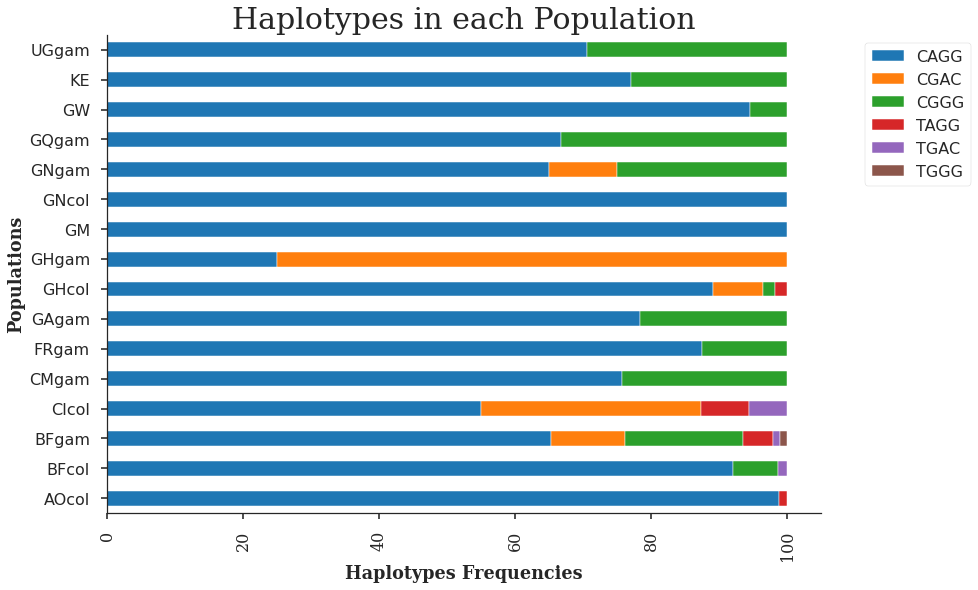

In [14]:
# plot the haplotypes frequencies in each populations
plt.style.use(['seaborn-poster'])
plt.figure(figsize=(16, 9), dpi=60)
pt1.plot(x='Country_code', kind='barh', stacked=True)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Populations', fontfamily='serif')
plt.xlabel('Haplotypes Frequencies', fontfamily='serif')
plt.title('Haplotypes in each Population',
          fontsize=30, fontfamily='serif')
plt.xticks(rotation=90, fontfamily='serif')
sns.despine(right=True, top=True)
plt.show()